# Ionosphere Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

La base de datos consta de mediciones de un array de 16 antenas de alta frecuencia ubicadas en Goose Bay, Labrador. Dichas mediciones fueron clasificadas como "buenas" y "malas", de acuerdo a si brindan realmente información sobre la ionosfera o no. El presente notebook busca implmenetar algoritmos de aprendizaje automático para determinar la validez de las mediciones de radar a partir de características electromagnéticas de la señal recibida por las antenas.

En el artículo original ([Sigillito et al, 1989](https://secwww.jhuapl.edu/techdigest/Content/techdigest/pdf/V10-N03/10-03-Sigillito_Class.pdf)) se realiza una operación de autocorrelación donde los argumentos son el tiempo de un pulso y el número de pulsos. Este dataset contiene dos atributos por número de pulso, que corresponden a los componentes complejos de la onda de radar recibida. Es decir, cada par de columnas $(a_n, a_{n+1}$) corresponden a una medición.

In [2]:
url = 'https://raw.githubusercontent.com/frank-britto/grupo06/main/challenge_04/ionosphere.data'
column_names = ['a' + str(i) for i in range(34)]
column_names.append('Classification')
data = pd.read_csv(url, names = column_names)
data.head()

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a25,a26,a27,a28,a29,a30,a31,a32,a33,Classification
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


## Análisis exploratorio de datos

In [3]:
data.dtypes

a0                  int64
a1                  int64
a2                float64
a3                float64
a4                float64
a5                float64
a6                float64
a7                float64
a8                float64
a9                float64
a10               float64
a11               float64
a12               float64
a13               float64
a14               float64
a15               float64
a16               float64
a17               float64
a18               float64
a19               float64
a20               float64
a21               float64
a22               float64
a23               float64
a24               float64
a25               float64
a26               float64
a27               float64
a28               float64
a29               float64
a30               float64
a31               float64
a32               float64
a33               float64
Classification     object
dtype: object

Observamos que todas las columnas correspondientes a los pares complejos de la onda electromagnética son de tipo *float*, lo cual es correcto.

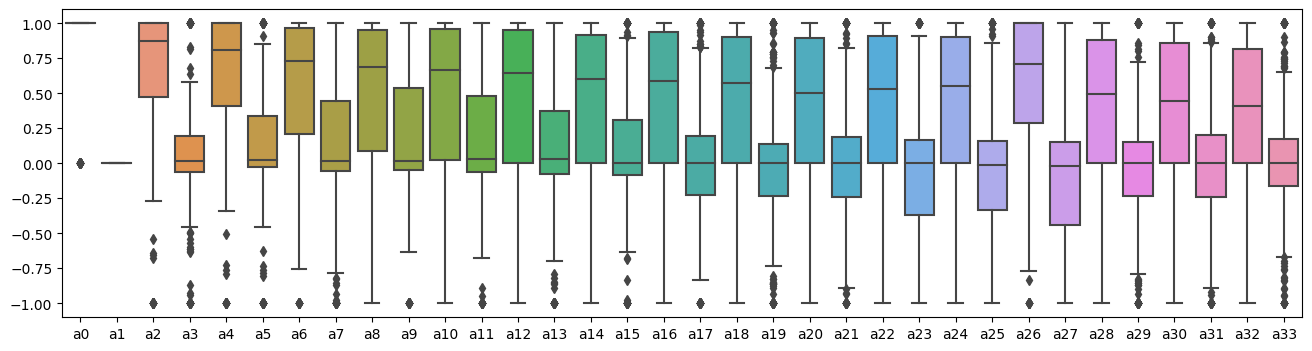

In [4]:
import seaborn as sns
plt.figure(figsize = (16,4))
sns.boxplot(data)
plt.show()

Tanto la primera como la segunda columna tienen solo valores de 1 (salvo una excepción) y 0, respectivamente, por lo que no ofrecen información relevante para la tarea de clasificación.

In [5]:
# Se eliminan las dos primeras columnas
data = data.iloc[:,2:]
data.head()

,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,...,a25,a26,a27,a28,a29,a30,a31,a32,a33,Classification
0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


En resumen, la tarea de clasificación consiste en identificar las mediciones buenas (*g* en el dataset) y malas (*b* en el dataset) a partir de las propiedades electromagnéticas de la señal de radar.

In [6]:
# Separando el target
data['Classification'] = data['Classification'].replace({'g':1, 'b':0})
y = data['Classification']

# de los features
X = data.iloc[:,:-1]

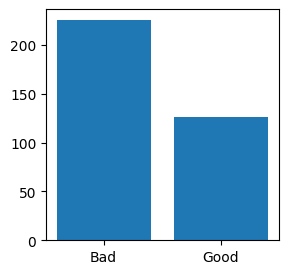

In [7]:
# Visualizando el balance de datos
plt.figure(figsize = (3,3))
plt.bar([0,1], y.value_counts())
plt.xticks([0,1], ['Bad', 'Good'])
plt.show()

Evaluamos si el dataset se encuentra completo, sin valores NaN.

In [8]:
# Ningún valor es NaN
np.sum(X.isnull())

a2     0
a3     0
a4     0
a5     0
a6     0
a7     0
a8     0
a9     0
a10    0
a11    0
a12    0
a13    0
a14    0
a15    0
a16    0
a17    0
a18    0
a19    0
a20    0
a21    0
a22    0
a23    0
a24    0
a25    0
a26    0
a27    0
a28    0
a29    0
a30    0
a31    0
a32    0
a33    0
dtype: int64

### Seleccion de features

Debido a que el dataset no contiene información adicional salvo las mediciones, no es posible determinar de forma analítica cual de los pares de números complejos nos permitirá realizar una mejor clasificación. Es decir, no conocemos que par de mediciones tiene una mayor correlación con el output que deseamos, o bien que par de mediciones nos permite diferenciar claramente entre una medición buena y mala.

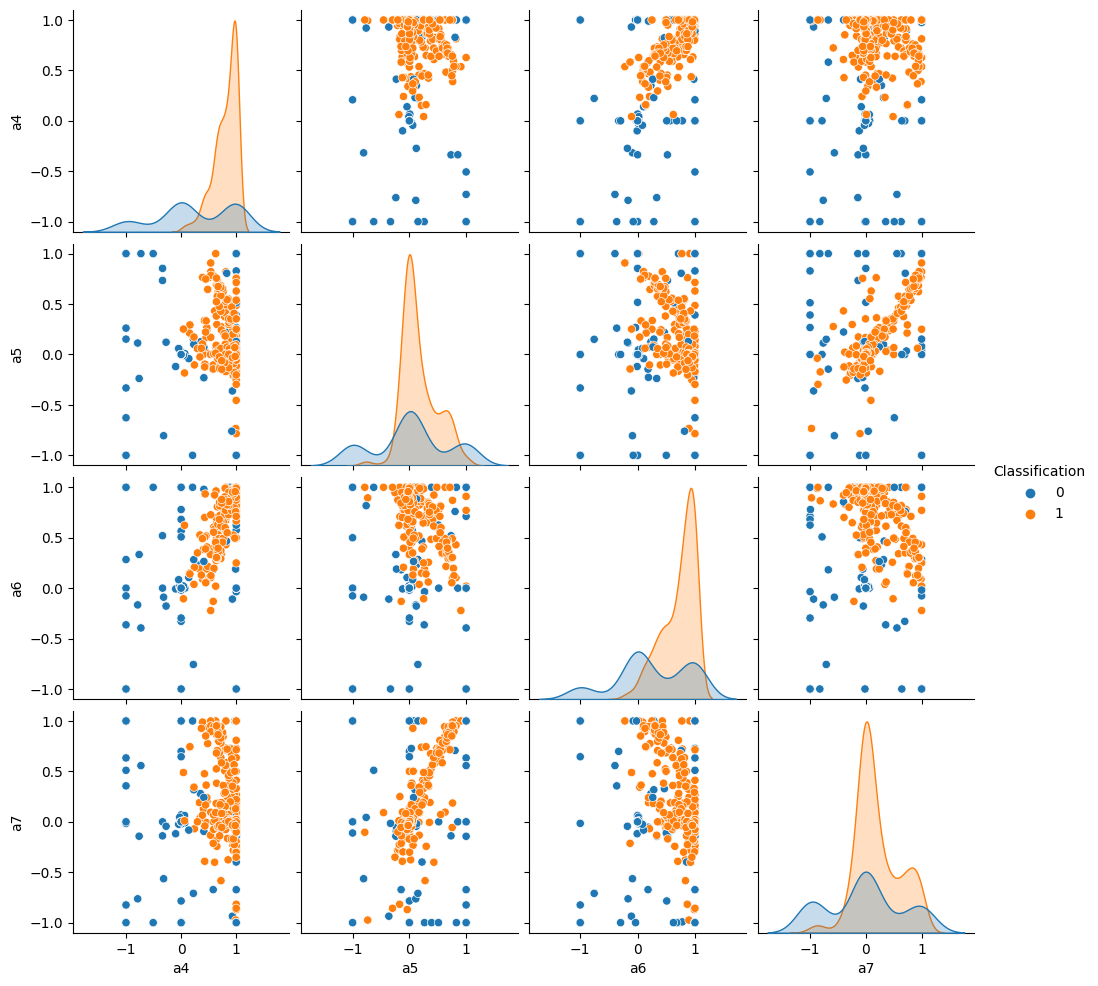

In [9]:
# Para ejemplificar 
sns.pairplot(data = pd.concat([data.iloc[:,2:6], data.iloc[:,-1]], axis = 1), hue = 'Classification')

Por lo tanto, se utilizará el método `SelectKBest` de `sklearn.feature_selection`, utilizando como métrica la información mutua. De acuerdo a la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif) de la librería:

> La información mutua entre dos variables al azar es un número no negativo que mide la dependencia entre ambas variables (en este caso, entre el *target* y cada feature). Será igual a cero si y solo si ambas variables son independientes, y mientras mayor sea el valor, mayor dependencia existirá




In [10]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
best_features = SelectKBest(mutual_info_classif, k=10)
best_fit = best_features.fit(X, y)
df_scores = pd.DataFrame(best_fit.scores_)
df_columns = pd.DataFrame(X.columns)

featureScores = pd.concat([df_columns, df_scores], axis = 1)
featureScores.columns = ['Feature', 'Score']
features_1 = list(featureScores.nlargest(10, 'Score')['Feature'])
print(featureScores.nlargest(10, 'Score'))

   Feature     Score
3       a5  0.293226
5       a7  0.283537
2       a4  0.277104
28     a30  0.271831
30     a32  0.270767
26     a28  0.266023
24     a26  0.262362
18     a20  0.251046
0       a2  0.248199
10     a12  0.242302


Debido a que el valor de dependencia no es tan alto, tomaremos 10 features para realizar la clasificación. Adicionalmente, obtendremos otra matriz de features implementando un clasificador de árboles extra. De acuerdo a la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html):


> La clase *extra-trees classifier* implementa un meta estimador que ajusta una serie de árboles de decisión aleatorios, llamados *extra-trees*, en varias submuestras del conjunto de datos y utiliza el promedio para mejorar la precisión predictiva y controlar el *overfitting*.



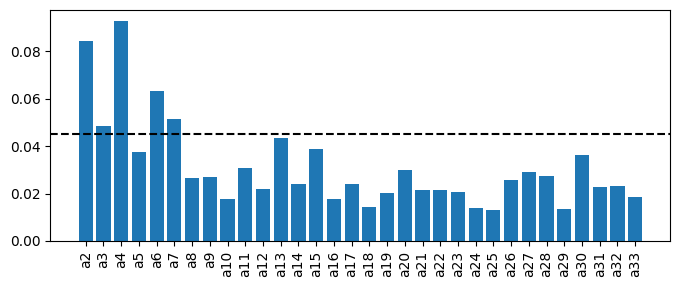

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier().fit(X,y)

plt.figure(figsize = (8,3))
plt.bar(range(np.shape(X)[1]), clf.feature_importances_)
plt.xticks(range(np.shape(X)[1]), X.columns, rotation = 90)
plt.axhline(y = 0.045, color = 'black', linestyle = '--')
plt.show()

In [12]:
features_2 = []
for i in range(np.shape(X)[1]):
  if clf.feature_importances_[i] >= 0.045:
    features_2.append(X.columns[i])

Al final, se comparará el rendimiento de los modelos de clasificación entrenados a partir de la siguiente lista de features.

In [13]:
print(features_1)

['a5', 'a7', 'a4', 'a30', 'a32', 'a28', 'a26', 'a20', 'a2', 'a12']


In [14]:
print(features_2)

['a2', 'a3', 'a4', 'a6', 'a7']


## Implementación del modelo

In [15]:
from sklearn.model_selection import train_test_split

# Primer set de features
X1_train, X1_test, y1_train, y1_test = train_test_split(X[features_1], y,
                                                    test_size=0.2, random_state=0,
                                                    stratify = y)

# Segundo set de features
X2_train, X2_test, y2_train, y2_test = train_test_split(X[features_2], y,
                                                    test_size=0.2, random_state=0,
                                                    stratify = y)

Implementamos un *dummy classifier* como punto de partida para la comparación.

In [16]:
from sklearn.dummy import DummyClassifier

# Evaluamos el primer set de features
dummy1 = DummyClassifier()
dummy1.fit(X1_train, y1_train)
print('Primer set de features:')
print('{:.3f}'.format(dummy1.score(X1_test, y1_test)))

# Evaluamos el segundo set de features
dummy2 = DummyClassifier()
dummy2.fit(X2_train, y2_train)
print('\nSegundo set de features:')
print('{:.3f}'.format(dummy2.score(X2_test, y2_test)))

Primer set de features:
0.648

Segundo set de features:
0.648


### Support Vector Machine

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

# Pipeline para regresión lineal
svm_clf = Pipeline([('scaler', StandardScaler()), ('svm', SVC())])

# K-fold cross validation para el primer set de features
cv = KFold(n_splits = 5)
score = cross_val_score(svm_clf, X1_train, y1_train, cv = cv)
print('Primer set de features: ')
print('{}'.format(score))
print('5-fold cross validation accuracy: {:.3f} '.format(np.mean(score)))

# K-fold cross validation para el segundo set de features
score = cross_val_score(svm_clf, X2_train, y2_train, cv = cv)
print('\nSegundo set de features: ')
print('{}'.format(score))
print('5-fold cross validation accuracy: {:.3f} '.format(np.mean(score)))

Primer set de features: 
[0.94642857 0.98214286 0.91071429 1.         0.91071429]
5-fold cross validation accuracy: 0.950 

Segundo set de features: 
[0.875      0.96428571 0.94642857 0.98214286 0.91071429]
5-fold cross validation accuracy: 0.936 


Utilizaremos `GridSearchCV` para intentar mejorar el rendimiento del modelo sin recurrir a overfitting.

In [18]:
svm_clf.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('svm', SVC())],
 'verbose': False,
 'scaler': StandardScaler(),
 'svm': SVC(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'svm__C': 1.0,
 'svm__break_ties': False,
 'svm__cache_size': 200,
 'svm__class_weight': None,
 'svm__coef0': 0.0,
 'svm__decision_function_shape': 'ovr',
 'svm__degree': 3,
 'svm__gamma': 'scale',
 'svm__kernel': 'rbf',
 'svm__max_iter': -1,
 'svm__probability': False,
 'svm__random_state': None,
 'svm__shrinking': True,
 'svm__tol': 0.001,
 'svm__verbose': False}

Los hiperparámetros que buscaremos optimizar son $C = 1.0$ y $\text{kernel} = \text{rbf}$.

In [19]:
# Optimizamos los hiperparámetros
param_grid = {'svm__C': np.concatenate([np.linspace(10,100,10),np.ones(1)]),
              'svm__kernel': ('linear', 'poly', 'rbf'), 
              }

cv = KFold(n_splits = 5)

# Evaluando el primer set de features
svm1_GS = GridSearchCV(estimator = svm_clf,
                     param_grid = param_grid,
                     cv = 5, verbose = 0, n_jobs = 2)

score = cross_val_score(svm_clf, X1_train, y1_train, cv = cv)
print('Primer set de features: ')
print('{}'.format(score))
print('5-fold cross validation accuracy: {:.3f} '.format(np.mean(score)))

# Evaluando el segundo set de features
svm2_GS = GridSearchCV(estimator = svm_clf,
                     param_grid = param_grid,
                     cv = 5, verbose = 0, n_jobs = 2)

score = cross_val_score(svm_clf, X2_train, y2_train, cv = cv)
print('\nSegundo set de features: ')
print('{}'.format(score))
print('5-fold cross validation accuracy: {:.3f} '.format(np.mean(score)))

Primer set de features: 
[0.94642857 0.98214286 0.91071429 1.         0.91071429]
5-fold cross validation accuracy: 0.950 

Segundo set de features: 
[0.875      0.96428571 0.94642857 0.98214286 0.91071429]
5-fold cross validation accuracy: 0.936 


Después de la optimización, observamos que los valores de precisión del modelo no mejoran, por lo que supondremos que es el máximo rendimiento que puede alcanzar para los hiperparámetros elegidos.

### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
# Pipeline para regresión lineal
rf_clf = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

# K-fold cross validation para el primer set de features
cv = KFold(n_splits = 5)
score = cross_val_score(rf_clf, X1_train, y1_train, cv = cv)
print('Primer set de features: ')
print('{}'.format(score))
print('5-fold cross validation accuracy: {:.3f} '.format(np.mean(score)))

# K-fold cross validation para el segundo set de features
score = cross_val_score(rf_clf, X2_train, y2_train, cv = cv)
print('\nSegundo set de features: ')
print('{}'.format(score))
print('5-fold cross validation accuracy: {:.3f} '.format(np.mean(score)))

Primer set de features: 
[0.94642857 0.96428571 0.875      0.96428571 0.875     ]
5-fold cross validation accuracy: 0.925 

Segundo set de features: 
[0.89285714 0.96428571 0.91071429 0.96428571 0.85714286]
5-fold cross validation accuracy: 0.918 


Nuevamente utilizaremos `GridSearchCV` para intentar mejorar el rendimiento del modelo sin recurrir a overfitting. 

In [21]:
rf_clf.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('rf', RandomForestClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'rf': RandomForestClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'sqrt',
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__min_weight_fraction_leaf': 0.0,
 'rf__n_estimators': 100,
 'rf__n_jobs': None,
 'rf__oob_score': False,
 'rf__random_state': None,
 'rf__verbose': 0,
 'rf__warm_start': False}

Los hiperparámetros que buscaremos optimizar son $\text{n_estimators} = 100$, $\text{criterion} = \text{gini}$ y $\text{max_depth} = \text{None}$

In [22]:
# Optimizamos los hiperparámetros
param_grid = {'rf__n_estimators': [100, 150, 200, 250],
              'rf__criterion': ('gini', 'entropy'), 
              'rf__max_depth': [3, 5, 7]
              }

cv = KFold(n_splits = 5)

# Evaluando el primer set de features
rf1_GS = GridSearchCV(estimator = rf_clf,
                     param_grid = param_grid,
                     cv = 5, verbose = 0, n_jobs = 2)

score = cross_val_score(rf_clf, X1_train, y1_train, cv = cv)
print('Primer set de features: ')
print('{}'.format(score))
print('5-fold cross validation accuracy: {:.3f} '.format(np.mean(score)))

# Evaluando el segundo set de features
rf2_GS = GridSearchCV(estimator = rf_clf,
                     param_grid = param_grid,
                     cv = 5, verbose = 0, n_jobs = 2)

score = cross_val_score(rf_clf, X2_train, y2_train, cv = cv)
print('\nSegundo set de features: ')
print('{}'.format(score))
print('5-fold cross validation accuracy: {:.3f} '.format(np.mean(score)))

Primer set de features: 
[0.94642857 0.96428571 0.875      0.98214286 0.875     ]
5-fold cross validation accuracy: 0.929 

Segundo set de features: 
[0.89285714 0.96428571 0.91071429 0.98214286 0.875     ]
5-fold cross validation accuracy: 0.925 


Con ambos set de features, la precisión del modelo aumenta en un 0.4% y 0.8%, respectivamente, después de la optimización.


## Evaluación del rendimiento 

Utilizamos la partición de la base de datos de la validación, y evaluaremos las mejores métricas de cada modelo.

In [23]:
svm1_GS.fit(X1_train, y1_train)
rf1_GS.fit(X1_train, y1_train)
svm2_GS.fit(X2_train, y2_train)
rf2_GS.fit(X2_train, y2_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=2,
             param_grid={'rf__criterion': ('gini', 'entropy'),
                         'rf__max_depth': [3, 5, 7],
                         'rf__n_estimators': [100, 150, 200, 250]})

In [24]:
print('Primer set de features:')
print(f'SVM: {svm1_GS.best_params_}')
print(f'Random Forest: {rf1_GS.best_params_}')
print('\nSegundo set de features:')
print(f'SVM: {svm2_GS.best_params_}')
print(f'Random Forest: {rf2_GS.best_params_}')

Primer set de features:
SVM: {'svm__C': 1.0, 'svm__kernel': 'rbf'}
Random Forest: {'rf__criterion': 'gini', 'rf__max_depth': 5, 'rf__n_estimators': 200}

Segundo set de features:
SVM: {'svm__C': 1.0, 'svm__kernel': 'rbf'}
Random Forest: {'rf__criterion': 'entropy', 'rf__max_depth': 7, 'rf__n_estimators': 250}


En el caso del SVM, observamos que los hiperparámetros optimizados son los mismos que el modelo sin optimizar, por lo que, efectivamente, el valor de precisión de cross-validation era el máximo. En el caso del Random Forest, con el primer set de features los 
hiperparámetros `max_depth` y `n_estimators` cambiaron respecto al modelo original, lo que pudo haber aumentado la precisión del modelo. De la misma manera con el segundo set de features, considerando que el también cambió de `gini` a `entropy`.


In [42]:
#@title Métricas de desempeño
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Evaluando el primer set de features

y1_pred = [model.predict(X1_test) for model in [dummy1, svm1_GS, rf1_GS]]
metrics = {'Accuracy':list(), 'F1 score':list(), 'Precision':list(), 'Recall':list()}

for j in range(len(y1_pred)):
  metrics['Accuracy'].append(accuracy_score(y1_test, y1_pred[j]))
  metrics['F1 score'].append(f1_score(y1_test, y1_pred[j],))
  metrics['Precision'].append(precision_score(y1_test, y1_pred[j],))
  metrics['Recall'].append(recall_score(y1_test, y1_pred[j],))

df_metrics = pd.DataFrame(metrics)
df_metrics.insert(0, 'Clasificadores', ['Dummy','SVM', 'Random Forest'])
df_metrics.set_index('Clasificadores', inplace=True)
print('Primer set de features:')
print(df_metrics)

# Evaluando el segundo set de features

y2_pred = [model.predict(X2_test) for model in [dummy2, svm2_GS, rf2_GS]]
metrics = {'Accuracy':list(), 'F1 score':list(), 'Precision':list(), 'Recall':list()}

for j in range(len(y2_pred)):
  metrics['Accuracy'].append(accuracy_score(y2_test, y2_pred[j]))
  metrics['F1 score'].append(f1_score(y2_test, y2_pred[j],))
  metrics['Precision'].append(precision_score(y2_test, y2_pred[j],))
  metrics['Recall'].append(recall_score(y2_test, y2_pred[j],))

df_metrics = pd.DataFrame(metrics)
df_metrics.insert(0, 'Clasificadores', ['Dummy','SVM', 'Random Forest'])
df_metrics.set_index('Clasificadores', inplace=True)
print('\nSegundo set de features:')
print(df_metrics)

Primer set de features:
                Accuracy  F1 score  Precision    Recall
Clasificadores                                         
Dummy           0.647887  0.786325   0.647887  1.000000
SVM             0.957746  0.967033   0.977778  0.956522
Random Forest   0.957746  0.967742   0.957447  0.978261

Segundo set de features:
                Accuracy  F1 score  Precision    Recall
Clasificadores                                         
Dummy           0.647887  0.786325   0.647887  1.000000
SVM             0.915493  0.937500   0.900000  0.978261
Random Forest   0.943662  0.957447   0.937500  0.978261


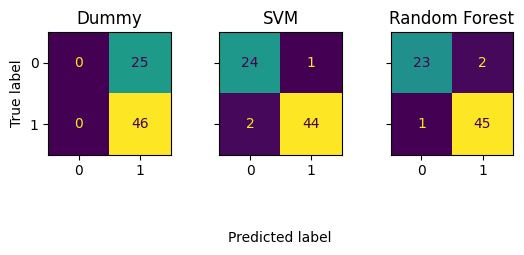

In [43]:
#@title Matriz de confusión (primer set)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = ['Dummy','SVM', 'Random Forest']

f, axes = plt.subplots(1, 3, figsize=(6, 3), sharey='row')

for i in range(3):
  cf_matrix = confusion_matrix(y1_test, y1_pred[i])
  disp = ConfusionMatrixDisplay(cf_matrix,)
  disp.plot(ax=axes[i],)
  disp.ax_.set_title(labels[i])
  disp.im_.colorbar.remove()
  disp.ax_.set_xlabel('')
  if i!=0:
      disp.ax_.set_ylabel('')

f.text(0.425, 0.0, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)
plt.show()

Para el primer set de features, observamos que tanto el modelo de Random Forest como SVM tienen un desempeño similar.

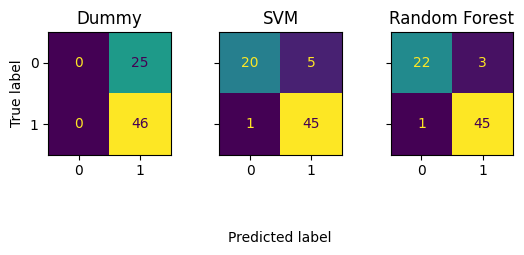

In [45]:
#@title Matriz de confusión (segundo set)
labels = ['Dummy','SVM', 'Random Forest']

f, axes = plt.subplots(1, 3, figsize=(6, 3), sharey='row')

for i in range(3):
  cf_matrix = confusion_matrix(y2_test, y2_pred[i])
  disp = ConfusionMatrixDisplay(cf_matrix,)
  disp.plot(ax=axes[i],)
  disp.ax_.set_title(labels[i])
  disp.im_.colorbar.remove()
  disp.ax_.set_xlabel('')
  if i!=0:
      disp.ax_.set_ylabel('')

f.text(0.425, 0.0, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)
plt.show()

En el segundo set de features podemos observar un mejor desempeño del Random Forest con respecto al SVM (comete menos errores). Sin embargo, en comparación con el primer set de features, el SVM entrenado con una mayor cantidad de features comete menos errores. 

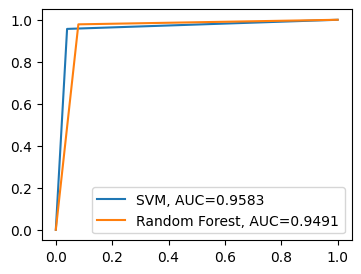

In [28]:
#@title Curvas ROC (primer set)
from sklearn import metrics

plt.figure(figsize = (4,3))

for i in range(2):
  fpr, tpr, _ = metrics.roc_curve(y1_test, y1_pred[i])
  auc = round(metrics.roc_auc_score(y1_test, y1_pred[i]), 4)
  plt.plot(fpr,tpr,label=f"{labels[i]}, AUC="+str(auc))

plt.legend()
plt.show()

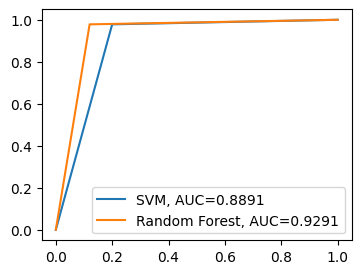

In [29]:
#@title Curvas ROC (segundo set)
from sklearn import metrics

plt.figure(figsize = (4,3))

for i in range(2):
  fpr, tpr, _ = metrics.roc_curve(y2_test, y2_pred[i])
  auc = round(metrics.roc_auc_score(y2_test, y2_pred[i]), 4)
  plt.plot(fpr,tpr,label=f"{labels[i]}, AUC="+str(auc))

plt.legend()
plt.show()

De ambas curvas ROC, observamos como el modelo de SVN entrenado con el primer set de features presente el mayor valor. Considerando también la matriz de confusión, podemos sustentar que el **modelo de SVM entrenado con el primer set de features es el modelo con mejor desempeño en general**

## Guardando el modelo

Guardaremos con el módulo `pickle` el modelo de mejor desempeño.

In [47]:
import joblib
joblib.dump(svm1_GS, 'ionosphere_pred_svm1.pkl')

['ionosphere_pred_svm1.pkl']

Considerando que la diferencia entre las métricas del modelo de SVM entrenado con el primer set de features y el modelo de Random Forest entrenado con el segundo set de features es < 5%, se considera guardar también este modelo de Random Forest debido a que presenta una ventaja técnica: utiliza solo 5 valores de entrada, lo que se podría traducir a necesitar un menor número de sensores (antenas, en este caso) para realizar la tarea de clasificación.

In [48]:
features_1

['a5', 'a7', 'a4', 'a30', 'a32', 'a28', 'a26', 'a20', 'a2', 'a12']

Agrupados en parejas como se mencionó anteriormente, el primer set de features necesitaría 9 antenas.

In [32]:
features_2

['a2', 'a3', 'a4', 'a6', 'a7']

Mientras que el segundo set de features solo necesitaría 3 antenas.

In [49]:
joblib.dump(rf2_GS, 'ionosphere_pred_rf2.pkl')

['ionosphere_pred_rf2.pkl']